In [1]:
pip install pandas numpy matplotlib seaborn folium geopandas plotly


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px


In [3]:
df = pd.read_csv("US_Accidents_March23.csv")  # Ensure correct file path
df.head()  # Display the first few rows


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
# Check available columns
print(df.columns)

# Define columns to drop (only if they exist in the dataset)
columns_to_drop = ['Wind_Chill(F)', 'Number', 'Airport_Code']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)


Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Load dataset
df = pd.read_csv("US_Accidents_March23.csv")  # Change to your actual dataset path

# Display available columns
print("Columns in dataset:", df.columns)

# Drop unnecessary columns (only if they exist)
columns_to_drop = ['Wind_Chill(F)', 'Number', 'Airport_Code']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)

# Handling missing values
df.fillna(method='ffill', inplace=True)  # Forward fill missing values
df.fillna(method='bfill', inplace=True)  # Backward fill as a fallback

# Convert time-related columns to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

# Extract important time-based features
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek  # Monday=0, Sunday=6
df['Month'] = df['Start_Time'].dt.month


Columns in dataset: Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


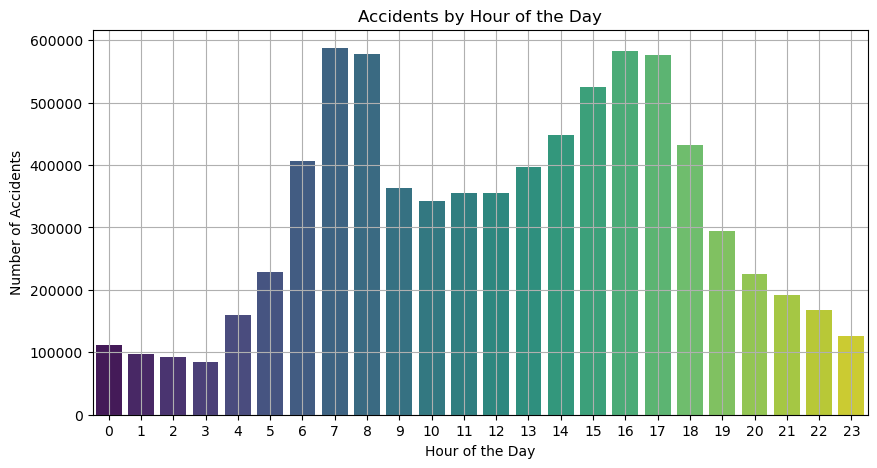

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Hour'], palette="viridis")
plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()


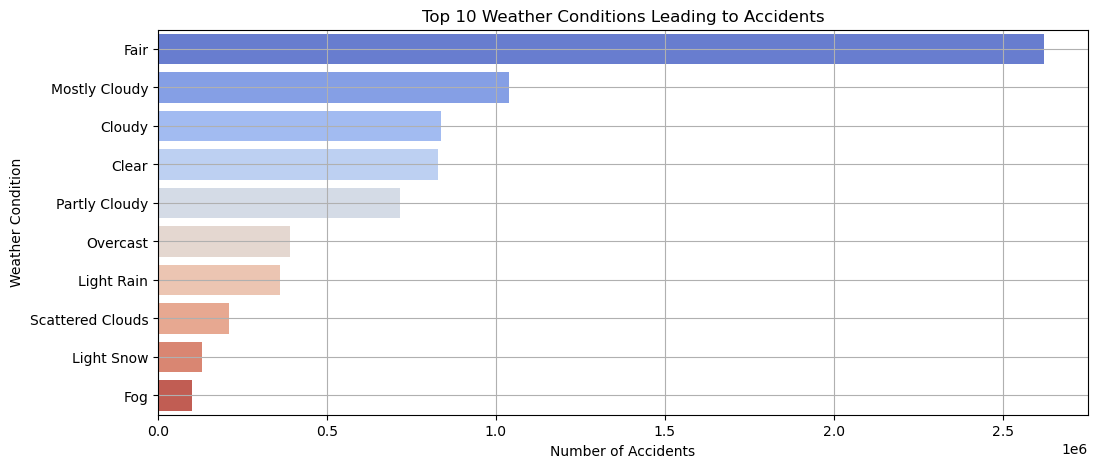

In [17]:
plt.figure(figsize=(12, 5))
sns.countplot(y=df['Weather_Condition'], order=df['Weather_Condition'].value_counts().index[:10], palette="coolwarm")
plt.title("Top 10 Weather Conditions Leading to Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.grid(True)
plt.show()


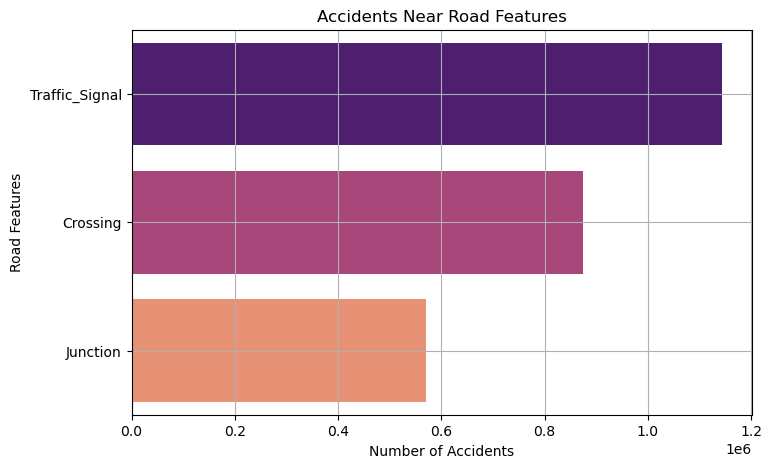

In [18]:
road_features = ['Crossing', 'Junction', 'Traffic_Signal']
df_road = df[road_features].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=df_road.values, y=df_road.index, palette="magma")
plt.title("Accidents Near Road Features")
plt.xlabel("Number of Accidents")
plt.ylabel("Road Features")
plt.grid(True)
plt.show()


In [20]:
# Select latitude and longitude
df_sample = df[['Start_Lat', 'Start_Lng']].dropna().sample(5000)  # Use sample for efficiency

# Create a map centered on the USA
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add heatmap layer
HeatMap(data=df_sample, radius=8).add_to(m)

# Save and display the heatmap
m.save("Accident_Heatmap.html")
print("Accident Heatmap saved as Accident_Heatmap.html")


Accident Heatmap saved as Accident_Heatmap.html
